# Chapter 3 비지도 학습과 데이터 전처리

비지도 학습이란 알고 있는 출력값이나 정보 없이 학습 알고리즘을 가르쳐야 하는 모든 종류의 머신러닝, 입력 데이터만으로 데이터에서 지식을 추출할 수 있어야 한다.

# 3.1 비지도 학습의 종류


> 비지도 변환(unsupervised transformation) : 데이터를 새롭게 표현하여 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘 - 차원축소(dimensionality reduction)


> 군집(clustering) 알고리즘 : 데이터를 비슷한 것끼리 그룹으로 묶는 것.

# 3.2 비지도 학습의 도전 과제

> 데이터를 잘 이해하고 싶을 때 탐색적 분석 단계에서 많이 사용한다.


> 비지도 학습은 지도 학습의 전처리 단계에서도 사용된다.


> 지도 학습 알고리즘에서 전처리와 스케일 조정을 자주 사용하지만, 스케일 조정 메서드는 지도 정보(supervised information)를 사용하지 않으므로 비지도 방식이다.







# 3.3 데이터 전처리와 스케일 조정

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager as fm
from matplotlib import rc
%matplotlib inline
import pandas as pd
!pip install mglearn
import mglearn
import scipy as sp
import sklearn
import graphviz

#한글, 마이너스 기호 폰트 관련
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

#나눔 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'Nanum' in f]
# 한번 프린트 해보자
nanum_font
path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'
font_name = fm.FontProperties(fname=path, size=12).get_name()
plt.rc('font', family=font_name)
# 우선 fm._rebuild() 를 해주고
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 기호 오류 해결

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


3.0.3
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib


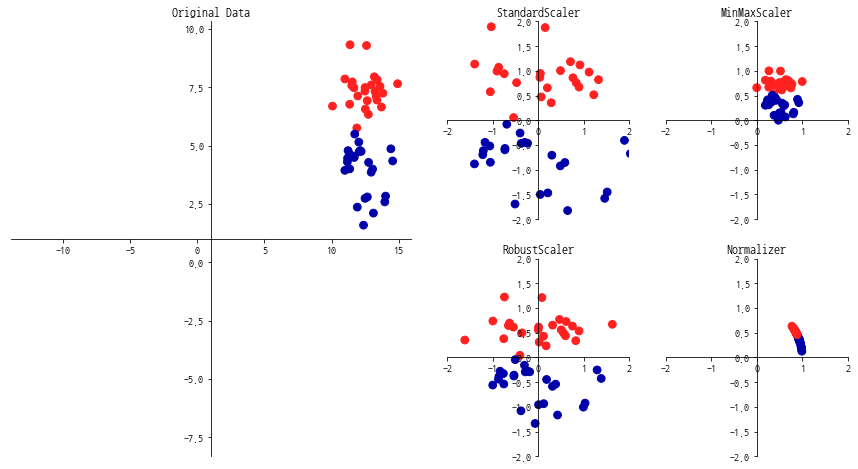

In [2]:
mglearn.plots.plot_scaling()

##3.3.1 여러 가지 전처리 방법

> StandardScaler : 각 특성의 평균을 0, 분산을 1로 변경, 특성의 최솟값과 최댓값 크기를 제한하지 않는다.


> RobustScaler : 중간 값(median)과 사분위 값(quartile)을 사용, 전체 데이터와 아주 동떨어진 데이터 포인트(예를 들면, 측정 에러)(outlier)에 영향을 받지 않음.


> MinMaxScaler는 모든 특성이 정확하게 0과 1사이에 위치하도록 데이터를 변경.


> Normalizer는 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정. 각 데이터 포인트가 다른 비율로(길이에 반비례하여) 스케일이 조정된다는 뜻. 이러한 정규화(normalization)는 특성 벡터의 길이는 상관 없고 데이터의 방향 (또는 각도)만이 중요할 때 많이 사용.










## 3.3.2 데이터 변환 적용하기


> 스케일을 조정하는 전처리 메서드들은 보통 지도 학습 알고리즘을 적용하기 전에 적용한다.



In [3]:
# cancer dataset에 SVM(SVC)을 적용하고 데이터 전처리에는 MinMaxScaler를 사용

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)


(426, 30)
(143, 30)


In [0]:
# 전처리가 구현된 파이썬 클래스를 임포트하고 객체를 생성
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

In [5]:
# scale 객체는 fit 메서드를 호출할 때 훈련 데이터(X_train)만 넘겨주며 y_train은 사용하지 않음.
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
# 실제로 훈련 데이터의 스케일을 조정하려면 스케일 객체의 transform 메서드를 사용

# 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다.
print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaled.max(axis=0))

#모든 특성의 값은 0과 1 사이로 변환되고, 변환된 데이터의 배열 크기는 원래 데이터와 동일하다. 즉 특성 값이 이동되거나 크기가 조정되었을 뿐

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다.
print("스케일 조정 후 특성별 최소값:\n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_test_scaled.max(axis=0))

# 0~1 값이 아닌 이유는 훈련 세트와 테스트 세트에 같은 변환이 적용되어야 하기 때문에, transform 메서드는 테스트 세트에 훈련 세트의 최솟값을 빼고 훈련 세트의 범위로 나누기 때문이다.

스케일 조정 후 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


## 3.3.3 (한국어판 부록) Quantile Transformer와 PowerTransformer


> Quantile Transformer는 기본적으로 1,000개의 분위(quantile)을 사용하여 데이터를 균등하게 분포시킴. 이상치에 민감하지 않고 전체 데이터를 0과 1사이로 압축한다.



In [0]:
# 필요한 모듈 임포트
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

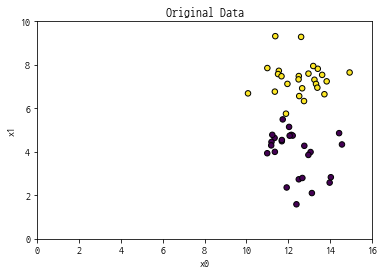

In [9]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.ylabel('x1')
plt.title("Original Data")
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


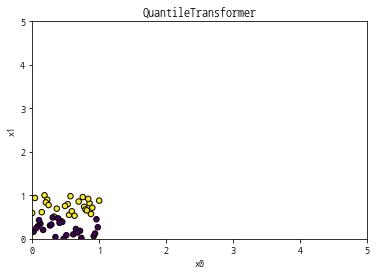

In [10]:
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

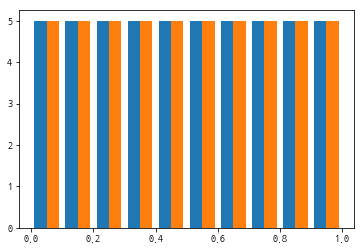

In [11]:
# 히스토그램
plt.hist(X_trans)
plt.show()



> QuantileTransformer의 분위 수는 n_quantiles 매개변수에서 설정할 수 있으며 기본값은 1,000이다.



In [12]:
# 속성 크기 확인
print(scaler.quantiles_.shape)

(50, 2)


In [13]:
# 하나의 특성과 다섯 개의 샘플로 이루어진 간단한 데이터 셋
x=np.array([[0], [5], [8], [9], [10]])

# np.percentile() 함수는 두 번째 매개변수에서 지정한 분위에 해당하는 샘플을 추출하여 반환
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))

[ 0.  5.  8.  9. 10.]


In [14]:
# QuantileTransformer로 변환 후 확인
x_trans = QuantileTransformer().fit_transform(x)
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100]))

[0.   0.25 0.5  0.75 1.  ]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


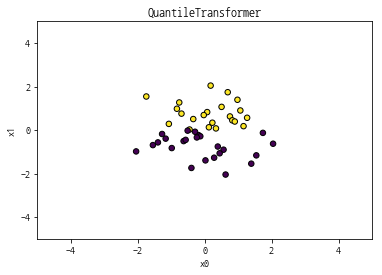

In [15]:
# QuantileTransformer의 output_distribution 매개변수에서 normal로 지정하여 정규분포로 출력을 바꿀 수 있다.
scaler = QuantileTransformer(output_distribution='normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.xlabel('x0')
plt.ylim(-5,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

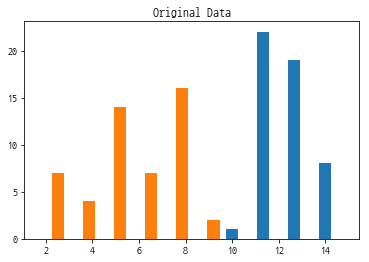

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


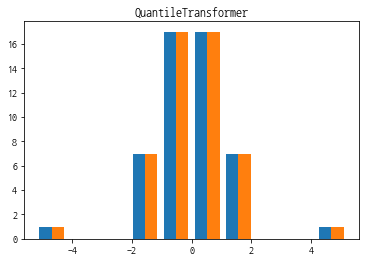

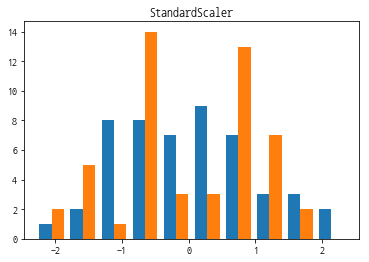

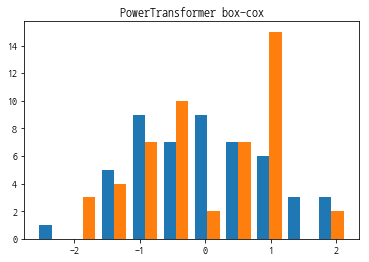

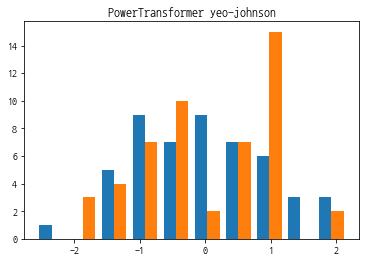

In [16]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()

## 3.3.4 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

> 지도 학습 모델에서 테스트 세트를 사용하려면 훈련 세트와 테스트 세트에 같은 변환을 적용해야 한다.



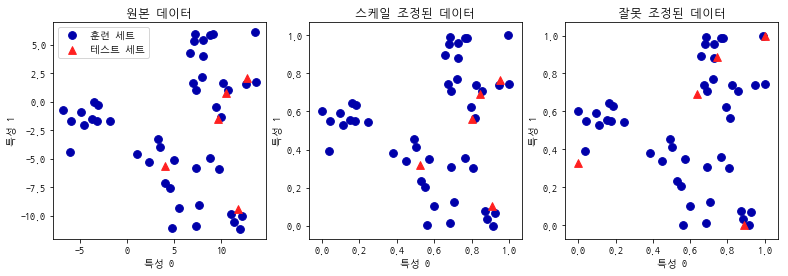

In [17]:
# 스케일 조정 할 때 테스트 세트를 이용해서 하는 경우

from sklearn.datasets import make_blobs
# 인위적인 데이터 생성
X, _= make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그립니다.
fig, axes = plt.subplots(1, 3, figsize=(13,4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

#MinMaxScaler를 사용해 스케일을 조정합니다.
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다.
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정합니다.
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다.
# 이는 예제를 위한 것으로, 절대로 이렇게 사용해서는 안 됩니다.
test_scaler=MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다.
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2.colors[1], label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 메소드 체이닝(chaining)을 사용하여 fit과 transform을 연달아 호출합니다.
X_scaled = scaler.fit(X_train).transform(X_train)
# 위와 동일하지만 더 효율적입니다.
X_scaled_d = scaler.fit_transform(X_train)

## 3.3.5 지도 학습에서 데이터 전처리 효과

In [19]:
# cancer dataset에서 SVC를 학습시킬 때 MinMaxScaler의 효과

from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm=SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.63


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
# MinMaxScaler를 사용해 데이터 스케일 조정

# 0~1 사이로 스케일 조정
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.97


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [21]:
# 평균 0, 분산 1을 갖도록 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


# 3.4 차원 축소, 특성 추출, 매니폴드 학습

> 대체적으로 데이터를 시각화, 압축, 지도학습에 이용하기 위해 비지도 학습을 사용해 데이터를 변환한다.

> 주성분 분석(principal component analysis, PCA), 비음수 행렬 분해(non-negative matrix factorization, NMF), t-SNE(t-distributed stochastic neighbor embedding) 등이 있다.





## 3.4.1 주성분 분석(PCA)

> 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술


> 데이터를 회전한 뒤 새로운 특성 중 일부만 선택





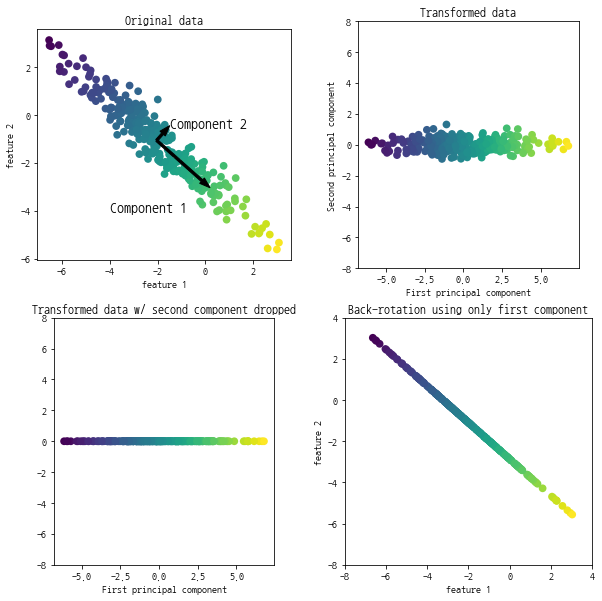

In [22]:
mglearn.plots.plot_pca_illustration()



> "Component 1"이라고 쓰여 있는, 분산이 가장 큰 방향을 찾는다.


> 이 벡터가 가장 많은 정보를 담고 있는 방향이다. 즉, 특성들의 상관관계가 가장 큰 방향


> 그 다음, Component 1과 직각인 방향 중에서 가장 많은 정보를 담은 방향을 찾는다. 이런 과정을 거쳐 찾은 방향을 데이터에 있는 주된 분산의 방향이라고 해서 주성분(principal component)라고 함.


> 원본 특성 개수 = 주성분 개수

> 두 번째 그래프는 Component1과 2를 각각 x, y 축에 나란하도록 회전한 것. PCA에 의해 회전된 두 축은 연관되어 있지 않으므로 변환된 데이터의 상관관계 행렬(correlation matrix)이 대각선 방향을 제외하고는 0이 됨.



> PCA는 주성분의 일부만 남기는 차원 축소 용도로 사용할 수 있음. 세 번째 그래프는 첫 번째 주성분만 유지한 것. 이러면 2차원에서 1차원이 됨.





> PCA를 적용해 유방암 데이터셋 시각화하기


> PCA가 가장 널리 사용되는 분야는 고차원 데이터셋의 시각화



















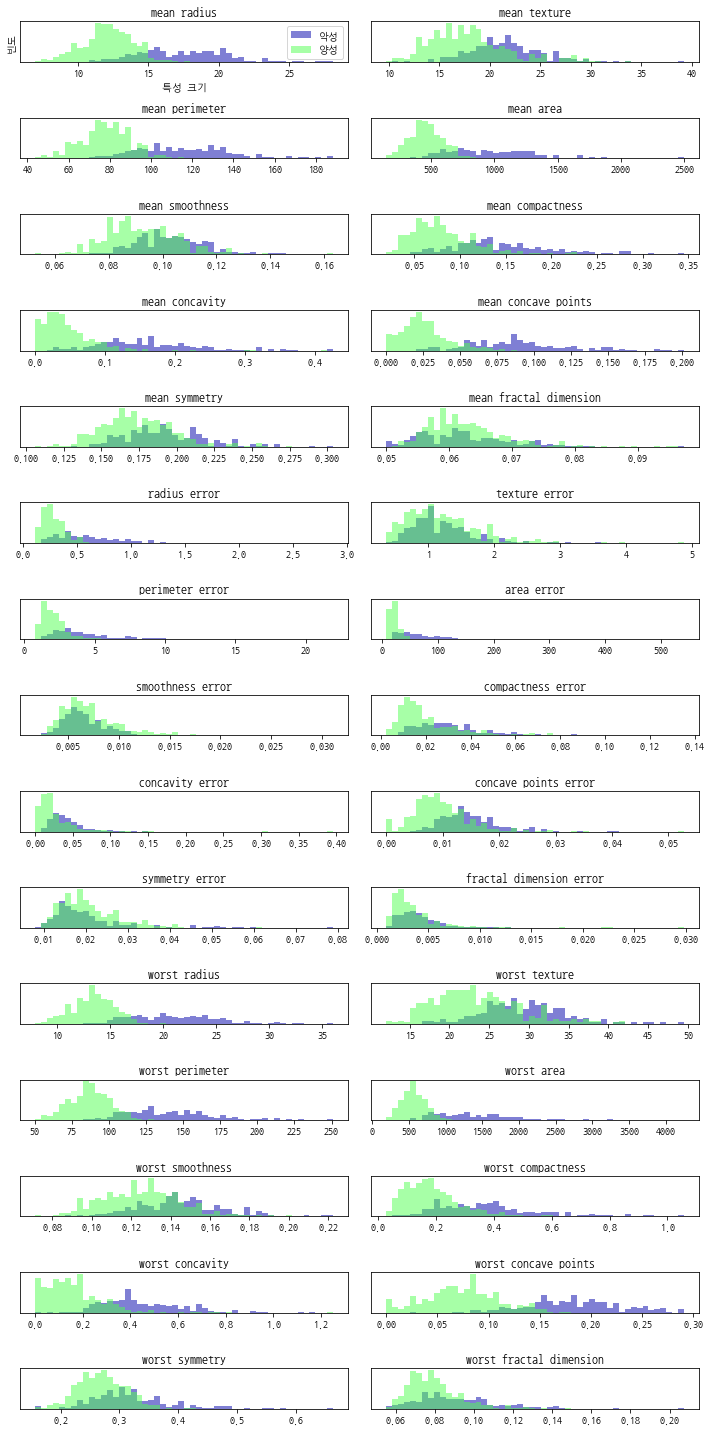

In [23]:
fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target ==1]

ax= axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()



> smoothness error는 두 히스토그램이 겹처 거의 쓸모 없음.


> worst concave points는 두 히스토그램이 확실히 구분되어 유용한 특성.


> 그러나 특성간의 상호작용은 위 히스토그램으로 알 수 없다.







In [0]:
# 처음 두 개의 주성분을 찾아 2차원 공간에 하나의 산점도로 데이터 시각화
# StandardScaler를 사용해 각 특성의 분산이 1이 되도록 데이터 스케일 조정

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [25]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지시킵니다.
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만듭니다.
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환시킵니다.
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, '두 번째 주성분')

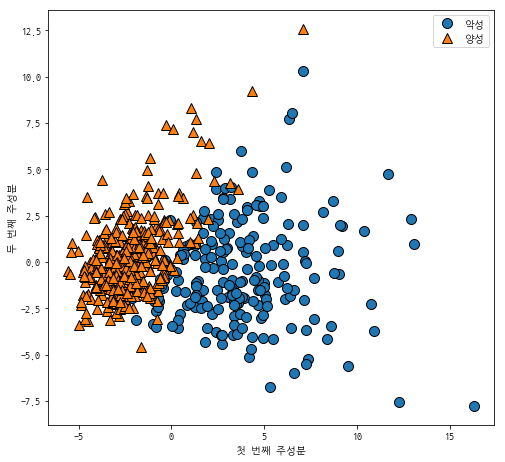

In [26]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")



> PCA는 비지도 학습이기 때문에 데이터에 있는 상관관계만을 고려함.


> PCA의 단점은 그래프의 두 축을 해석하기가 쉽지 않음. 원본 데이터가 조합된 형태이기 때문.





In [27]:
print("PCA 주성분 형태:", pca.components_.shape)

PCA 주성분 형태: (2, 30)


In [28]:
print("PCA 주성분:", pca.components_)

PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

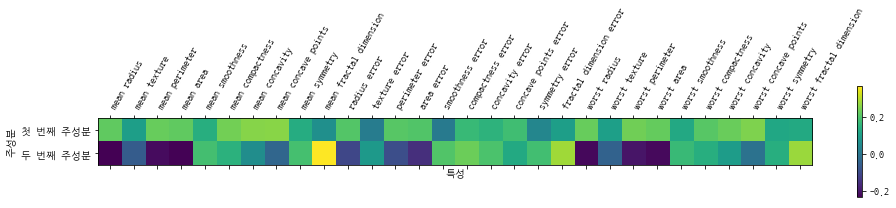

In [29]:
# 히트맵으로 시각화
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1],["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")



> 고유얼굴(eigenface) 특성 추출



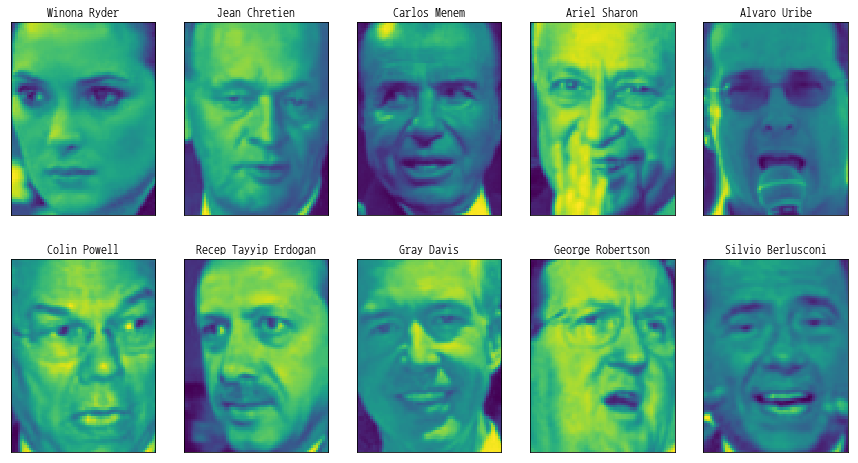

In [30]:
# 실행 오래 걸림
# PCA를 이용하여 LFW(Labeled Faces in the Wild) 데이터셋의 얼굴 이미지에서 특성 추출
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape=people.images[0].shape

fig, axes=plt.subplots(2, 5, figsize=(15, 8),
                      subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [31]:
print("people.images.shape:", people.images.shape)
print("클래스 개수:", len(people.target_names))

people.images.shape: (3023, 87, 65)
클래스 개수: 62


In [32]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25}{1:3}".format(name, count), end='    ')
    if (i+1) % 3 == 0:
        print()

Alejandro Toledo          39    Alvaro Uribe              35    Amelie Mauresmo           21    
Andre Agassi              36    Angelina Jolie            20    Ariel Sharon              77    
Arnold Schwarzenegger     42    Atal Bihari Vajpayee      24    Bill Clinton              29    
Carlos Menem              21    Colin Powell             236    David Beckham             31    
Donald Rumsfeld          121    George Robertson          22    George W Bush            530    
Gerhard Schroeder        109    Gloria Macapagal Arroyo   44    Gray Davis                26    
Guillermo Coria           30    Hamid Karzai              22    Hans Blix                 39    
Hugo Chavez               71    Igor Ivanov               20    Jack Straw                28    
Jacques Chirac            52    Jean Chretien             55    Jennifer Aniston          21    
Jennifer Capriati         42    Jennifer Lopez            21    Jeremy Greenstock         24    
Jiang Zemin               20  

In [0]:
# 데이터셋의 편중을 없애기 위해 사람마다 50개의 이미지만 선택

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]]=1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 같습니다.
X_people = X_people / 255.

In [34]:
# 분류하려는 얼굴과 가장 비슷한 얼굴 이미지를 찾는 1-최근접 이웃 분류기를 사용

from sklearn.neighbors import KNeighborsClassifier
# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델을 만듭니다.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


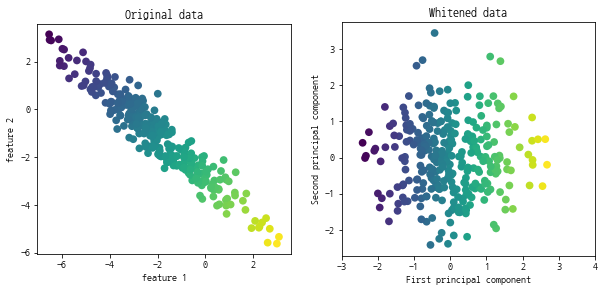

In [35]:
mglearn.plots.plot_pca_whitening()

In [36]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)

X_train_pca.shape: (1547, 100)


In [37]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.31


In [38]:
print("pca.components_.shape:", pca.components_.shape)

pca.components_.shape: (100, 5655)


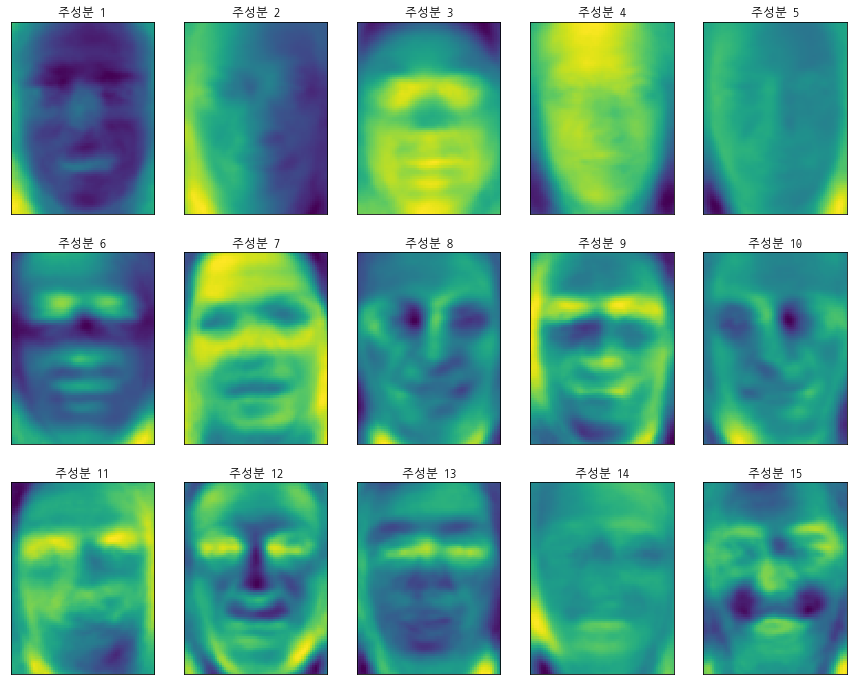

In [39]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format((i+1)))



> PCA 변환은 데이터를 회전시키고 분산이 작은 주성분을 덜어내는 것



________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 3.7s, 0.1min


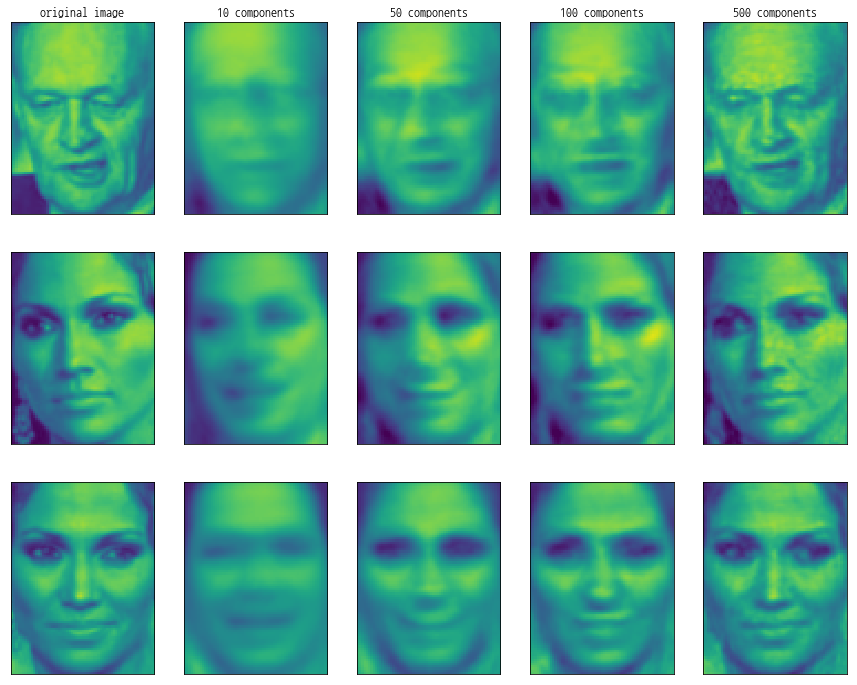

In [40]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, '두 번째 주성분')

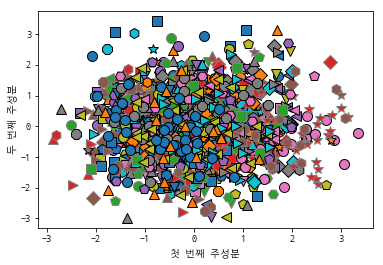

In [41]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

## 3.4.2비음수 행렬 분해(NMF)


> NMF(non-negative matrix factorization)는 음수가 아닌 성분과 계수 값을 찾음. 즉, 주성분과 계수가 모두 0보다 크거나 같음.

> NMF는 섞여 있는 데이터에서 원본 성분을 구분할 수 있음.





### 인위적 데이터에 NMF 적용하기

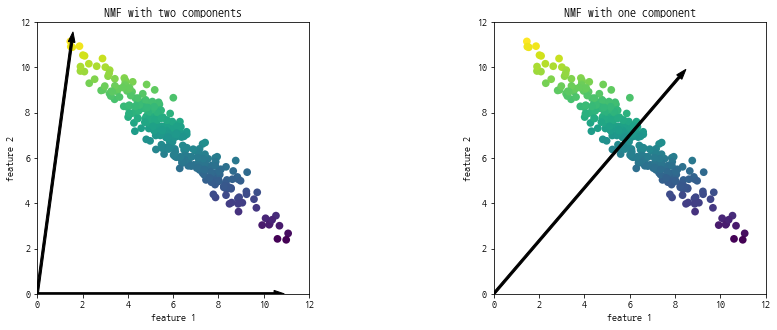

In [42]:
mglearn.plots.plot_nmf_illustration()

### 얼굴 이미지에 NMF 적용하기


> NMF의 핵심 매개변수는 추출할 성분의 갯수



In [43]:
#실행 시간 오래 걸림
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))


KeyboardInterrupt: ignored

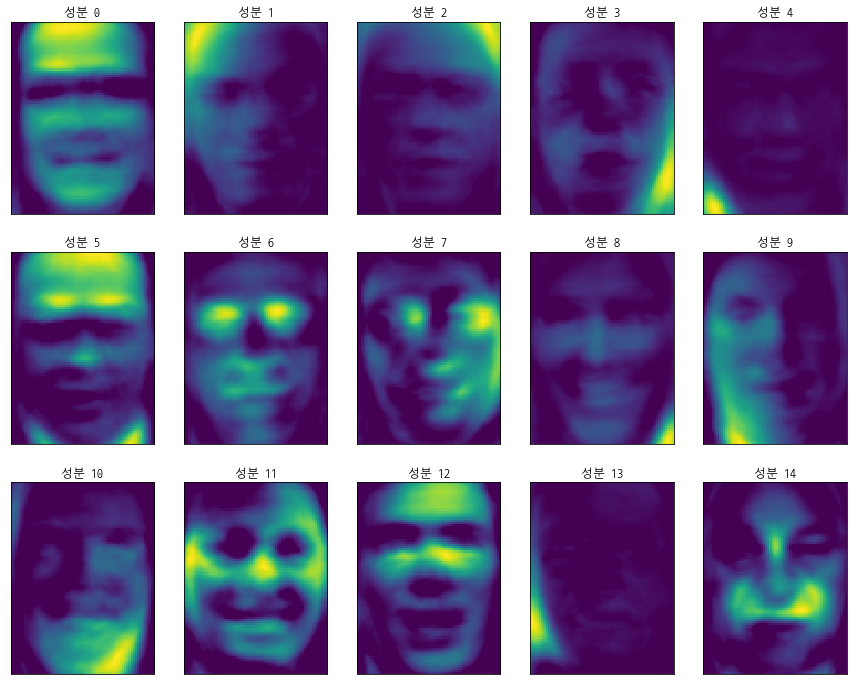

In [44]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0) #성분 15개만 추출
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))

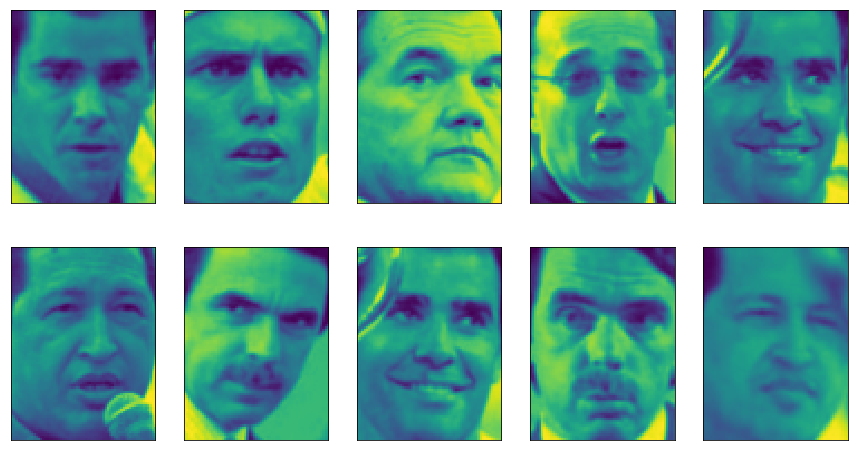

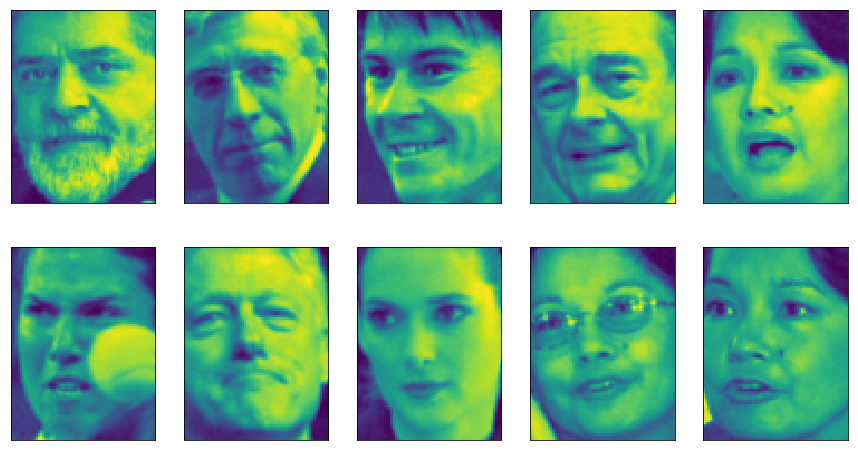

In [45]:
compn = 3
# 4번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks' : (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn = 7
# 8번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks':(), 'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, '신호')

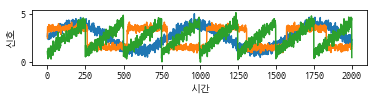

In [46]:
# 서로 다른 세 개의 입력으로부터 합성된 신호

S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S, '-')
plt.xlabel("시간")
plt.ylabel("신호")

In [47]:
# 원본 데이터를 사용해 100개의 측정 데이터를 만듭니다
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print("측정 데이터 형태:", X.shape)

측정 데이터 형태: (2000, 100)


In [48]:
# NMF를 사용해 세 개의 신호를 복원
nmf=NMF(n_components=3, random_state=42)
S_=nmf.fit_transform(X)
print("복원한 신호 데이터 형태:", S_.shape)

복원한 신호 데이터 형태: (2000, 3)


In [0]:
# PCA와 비교

pca = PCA(n_components=3)
H = pca.fit_transform(X)

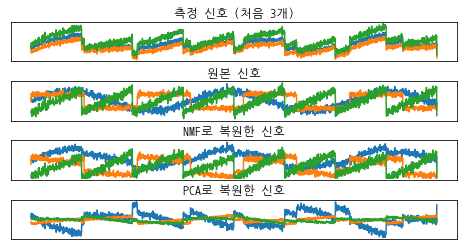

In [50]:
models = [X, S, S_, H]
names = ['측정 신호 (처음 3개)',
         '원본 신호',
         'NMF로 복원한 신호',
         'PCA로 복원한 신호']

fig, axes = plt.subplots(4, figsize=(8,4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks':(), 'yticks':()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

##3.4.3 t-SNE를 이용한 매니폴드 학습


> 매니폴드 학습(manifold learning)의 목적은 시각화.


> 매니폴드 알고리즘은 훈련 데이터를 새로운 표현으로 변환시키지만 새로운 데이터에는 적용하지 못함. 즉 테스트 세트에는 적용할 수 없음.





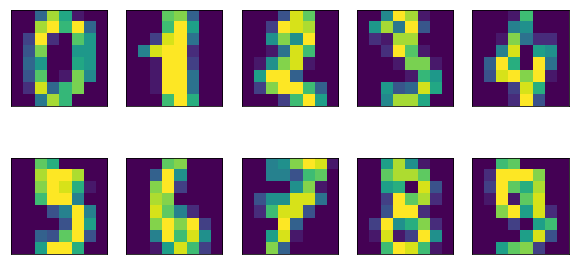

In [51]:
# 손글씨 숫자 데이터셋에 적용

from sklearn.datasets import load_digits
digits=load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10,5),
                         subplot_kw={'xticks':(),'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, '두 번째 주성분')

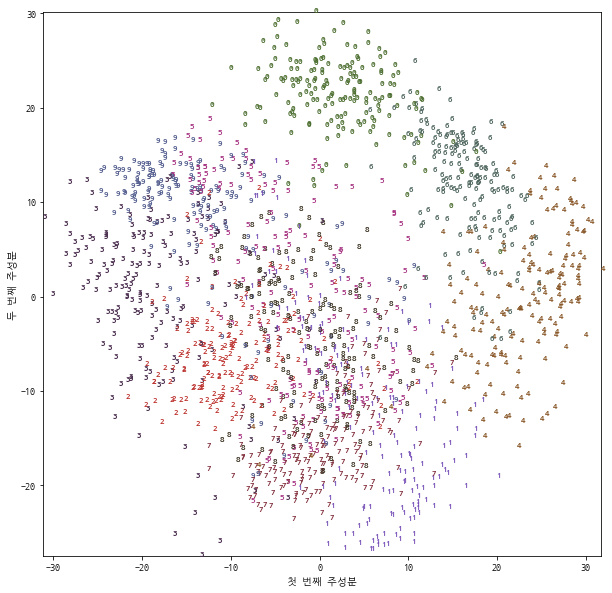

In [52]:
# PCA 모델을 생성합니다.
pca = PCA(n_components=2)
pca.fit(digits.data)
#처음 두 개의 주성분으로 숫자 데이터를 변환합니다.
digits_pca=pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다.
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
            color=colors[digits.target[i]],
            fontdict={'weight': 'bold', 'size':9})
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# TSNE에는 transform 메서드가 없으므로 대신 fit_transform을 사용합니다.
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE 특성 1')

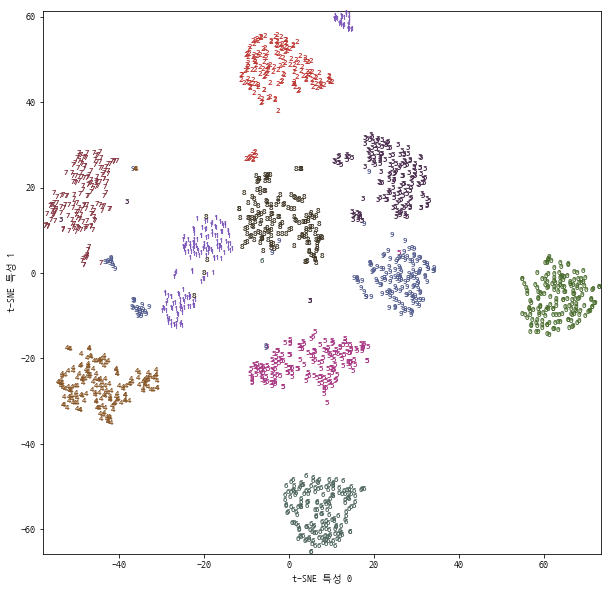

In [54]:
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다.
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color=colors[digits.target[i]],
            fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")

# 3.5 군집


> 군집(clustering)은 데이터셋을 클러스터(cluster)라는 그룹으로 나누는 작업. 한 클러스터 안의 데이터 포인트끼리는 매우 비슷하고 다른 클러스터의 데이터 포인트와는 구분되도록 데이터를 나누는 것이 목표



## 3.5.1 k-평균 군집

> k-평균(k-means) 군집은 데이터의 어떤 영역을 대표하는 클러스터 중심(cluster center)를 찾음.

> 데이터 포인트를 가장 가까운 클러스터 중심에 할당 -> 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정 -> 클러스터에 할당되는 데이터 포인트에 변화가 없을 때 알고리즘이 종료





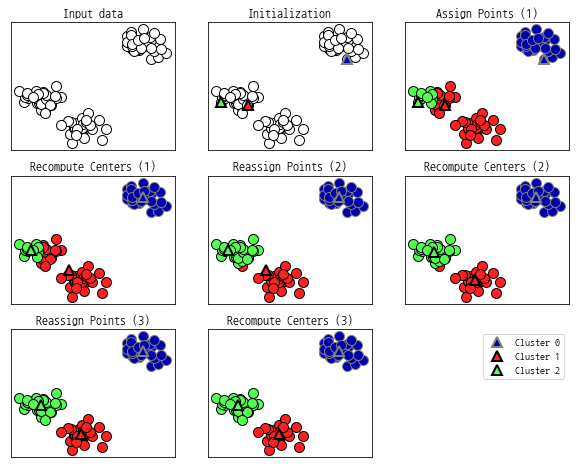

In [55]:
mglearn.plots.plot_kmeans_algorithm()



> 삼각형은 클러스터 중심이고 원은 데이터 포인트, 클러스터는 색으로 구분

> 클러스터 중심으로 삼을 데이터를 무작위로 3개 선택(Initialization) -> 가장 가까운 클러스터 중심에 할당(Assign points(1)) -> 할당된 포인트의 평균값으로 클러스터 중심 갱신 -> 같은 작업 반복 후 클러스터 중심에 할당되는 포인트에 변화가 없으면 알고리즘 멈춤.





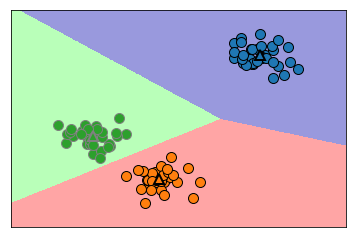

In [56]:
mglearn.plots.plot_kmeans_boundaries()

In [57]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성합니다.
X, y = make_blobs(random_state=1)

# 군집 모델을 만듭니다.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [58]:
print("클러스터 레이블:\n{}".format(kmeans.labels_))

클러스터 레이블:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [59]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


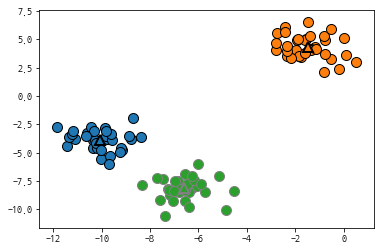

In [60]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],[0,1,2],
    markers='^', markeredgewidth=2)

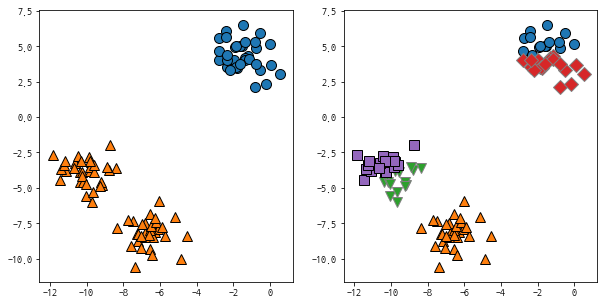

In [61]:
fig, axes=plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용합니다.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments=kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다.
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)
assignments=kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

### k-평균 알고리즘이 실패하는 경우



> 클러스터의 밀도가 다를 때 잘 처리하지 못함.



Text(0, 0.5, '특성 1')

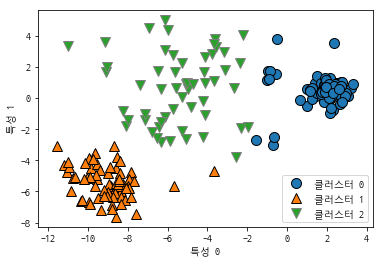

In [62]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc='best')
plt.xlabel("특성 0")
plt.ylabel("특성 1")



> 원형이 아닌 클러스터를 잘 구분하지 못함



Text(0, 0.5, '특성 1')

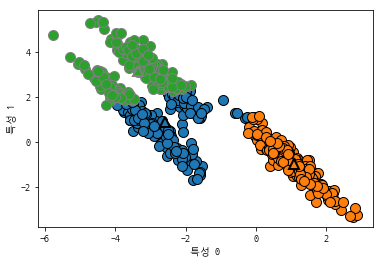

In [63]:
# 무작위로 클러스터 데이터를 생성합니다.
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경합니다.
transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred=kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타냅니다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("특성 0")
plt.ylabel("특성 1")



> two-moons 데이터의 형태일때도 잘 구분하지 못함.



Text(0, 0.5, '특성 1')

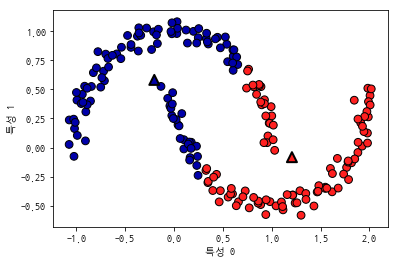

In [64]:
# two_moons 데이ㅓ를 생성합니다(이번에는 노이즈를 조금만 넣습니다).
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시합니다.
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolors='k')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### 벡터 양자화 또는 분해 메서드로서의 k-평균

> k-평균을 각 포인트가 하나의 성분으로 분해되는 관점으로 보는 것을 벡터 양자화(vector quantization)라고 한다.



In [0]:
#PCA, NMF, k-평균에서 추출한 성분과 100개의 성분으로 테스트 세트의 얼굴을 재구성한 것을 비교

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=42)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans. cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0, 0.5, 'nmf')

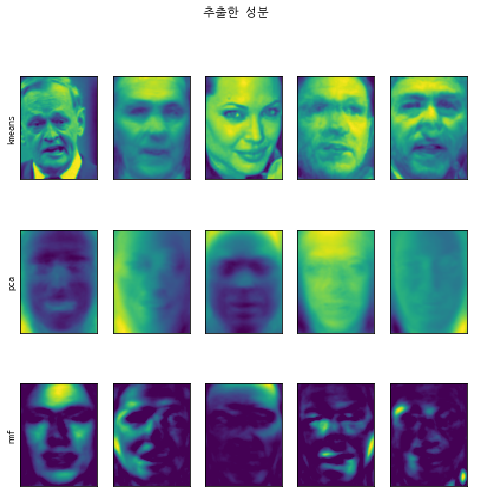

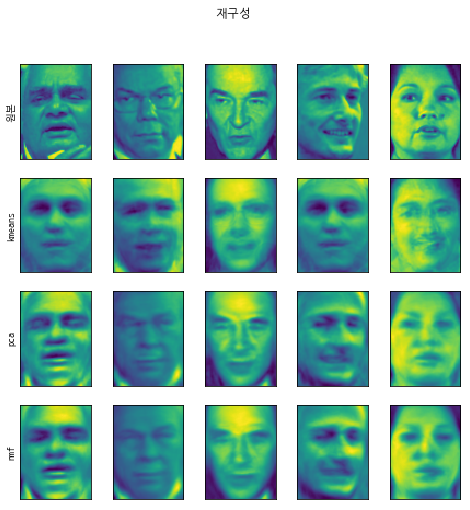

In [66]:
fig, axes =plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("추출한 성분")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0,0].set_ylabel("kmeans")
axes[1,0].set_ylabel("pca")
axes[2,0].set_ylabel("nmf")
fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8,8))
fig.suptitle("재구성")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("원본")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

클러스터 레이블:
 [9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


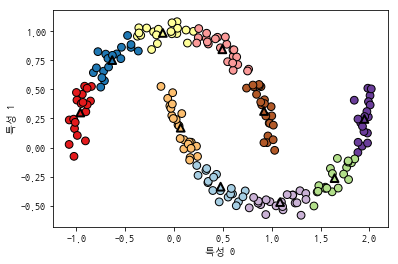

In [67]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired',
            edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")
print("클러스터 레이블:\n", y_pred)

In [68]:
distance_features = kmeans.transform(X)
print("클러스터 거리 데이터의 형태:", distance_features.shape)
print("클러스터 거리:\n", distance_features)

클러스터 거리 데이터의 형태: (200, 10)
클러스터 거리:
 [[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


## 3.5.2 병합군집


> 병합 군집(agglomerative clustering): 시작할 때 각 포인트를 하나의 클러스터로 지정하고, 그다음 어떤 종료 조건을 만족할 때까지 가장 비슷한 두 클러스터를 합쳐나가는 알고리즘. 종료조건은 클러스터 갯수



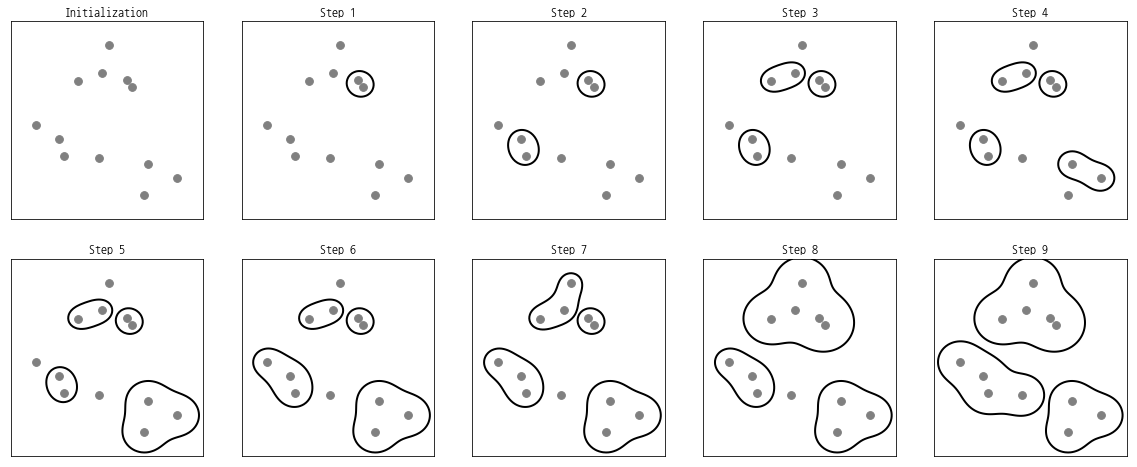

In [69]:
# 2차원 데이터셋에서 세 개의 클러스터를 찾기 위한 병합 군집의 과정
mglearn.plots.plot_agglomerative_algorithm()



> 병합 군집은 새로운 데이터 포인트에 대해서는 예측을 할 수 없다.

> 대신 훈련 세트로 모델을 만들고 클러스터 소속 정보를 얻기 위해서 fit_predict 메서드를 사용.





Text(0, 0.5, '특성 1')

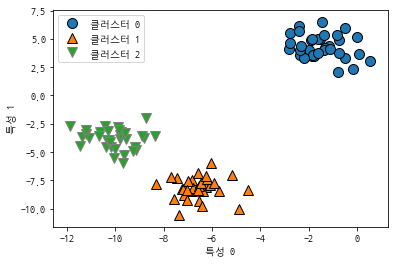

In [70]:
from sklearn.cluster import AgglomerativeClustering
X, y= make_blobs(random_state=1)

agg =AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc="best")
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### 계층적 군집과 덴드로그램



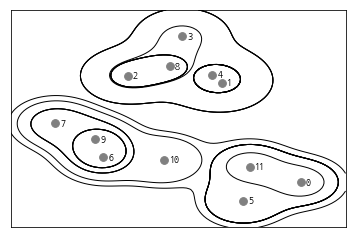

In [71]:
mglearn.plots.plot_agglomerative()



> 계층 군집의 모습을 자세히 나타내지만, 2차원 데이터일 때 뿐이며, 특성이 셋 이상인 데이터셋에는 사용할 수 없다.



Text(0, 0.5, '클러스터 거리')

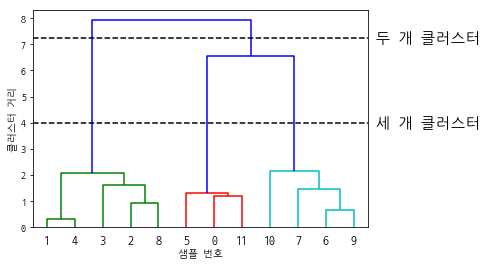

In [72]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트합니다.
from scipy.cluster.hierarchy import dendrogram, ward
X, y= make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X에 ward 함수를 적용합니다.
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 반환합니다.
linkage_array = ward(X)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다.
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다.
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4,4], '--', c='k')

ax.text(bounds[1], 7.25, ' 두 개 클러스터', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' 세 개 클러스터', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

## 3.5.3 DBSCAN


> DBSCAN(density-based spatial clustering of applications with noise)


> 클러스터의 개수를 미리 지정할 필요가 없음.


> 어떤 클래스에도 속하지 않는 포인트를 구분할 수 있음.


> 밀집 지역(dense region) : 데이터가 많아 붐비는 지역

> 핵심 샘플 : 밀집 지역에 있는 포인트


> DBSCAN의 두 개의 매개변수 min_samples, eps

> eps 거리 안에 데이터가 min_samples 개수만큼 들어 있으면 이 데이터 포인트를 핵심 샘플로 분류.

> eps보다 가까운 핵심 샘플은 DBSCAN에 의해 동일한 클러스터로 합쳐짐.

> eps 거리 안에 있는 포인트 수가 min_samples보다 적다면 그 포인트는 어떤 클래스에도 속하지 않는 잡음(noise)으로 레이블.




















In [73]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan=DBSCAN()
clusters= dbscan.fit_predict(X)
print("클러스터 레이블:\n", clusters)

클러스터 레이블:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]




> -1은 잡음 포인트를 의미



min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


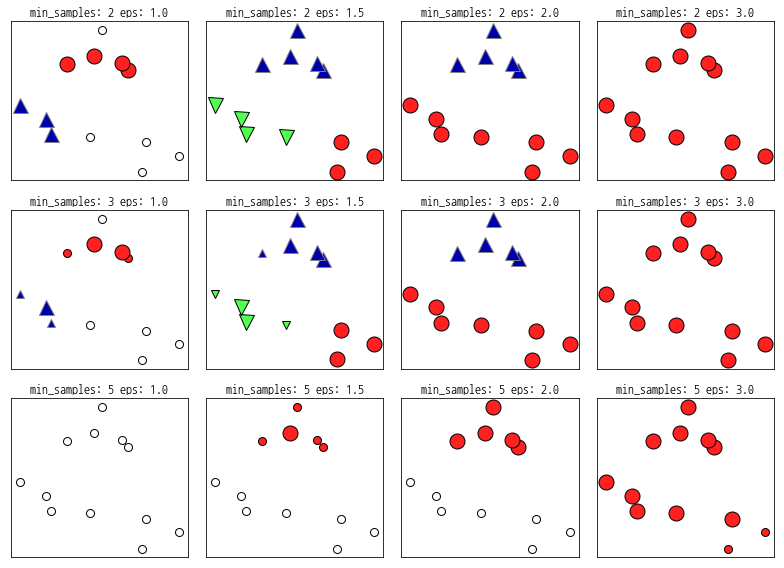

In [74]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, '특성 1')

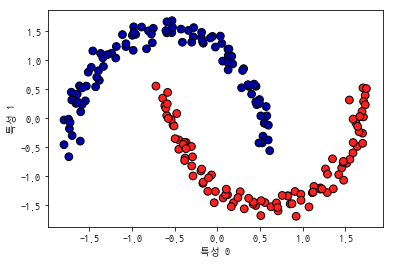

In [75]:
# two_moons 데이터셋에 DBSCAN을 적용한 결과

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다.
scaler=StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters=dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시합니다.
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60,
            edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")



> DBSCAN을 사용할 때 클러스터 할당 값(eps)을 주의해서 다뤄야 함.



## 3.5.4 군집 알고리즘의 비교와 평가

### 타깃값으로 군집 평가하기


> 군집 알고리즘의 결과를 실제 정답 클러스터와 비교하여 평가할 수 있는 지표로 ARI(adjusted rand index)와 NMI(normalized mutual information)가 있다.

> 1 : 최적일 때, 0 : 무작위로 분류될 때. (ARI는 음수가 될 수 있다.)






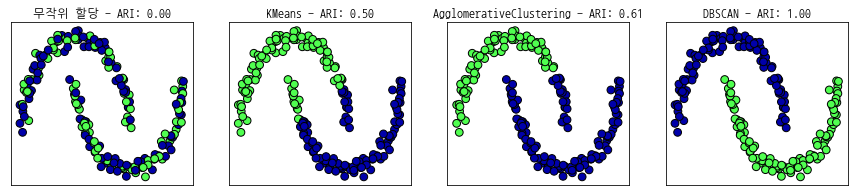

In [76]:
# ARI를 사용해서 k-평균, 병합 군집, DBSCAN 알고리즘 비교

from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다.
scaler=StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 사용할 알고리즘 모델을 리스트로 만듭니다.
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# 비교를 위해 무작위로 클러스터 할당합니다.
random_state = np.random.RandomState(seed=0)
random_clusters=random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다.
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당 - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그립니다.
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))



> 군집 모델을 평가할 때는 adjusted_rand_score, normalized_mutual_info_score 같은 군집용 측정 도구를 사용해야 한다.


> accuracy_score를 사용하면 레이블 이름이 일치하는지 확인하는 것이므로 군집 모델 평가에는 부적합하다.





In [77]:
from sklearn.metrics import accuracy_score

# 포인트가 클러스터로 나뉜 두 가지 경우
clusters1= [0,0,1,1,0]
clusters2=[1,1,0,0,1]
# 모든 레이블이 달라졌으므로 정확도가 0입니다.
print("정확도: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# 같은 포인트가 클러스터에 모였으므로 ARI는 1입니다.
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

정확도: 0.00
ARI: 1.00


### 타깃값 없이 군집 평가하기

> 실루엣 계수(silhouette coefficient) : 타깃값이 필요 없는 군집용 지표



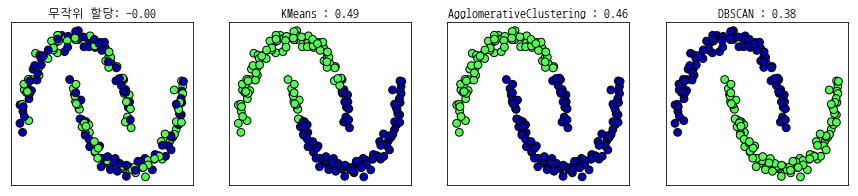

In [78]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 비교를 위해 무작위로 클러스터 할당합니다.
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다.
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당: {:.2f}".format(
        silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # 클러스터 할당과 클러스터 중심을 그립니다.
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))

### 얼굴 데이터셋으로 군집 알고리즘 비교



> DBSCAN으로 얼굴 데이터셋 분석하기



In [0]:
# LFW 데이터에서 고유얼굴을 찾은 다음 데이터를 변환합니다.
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

In [80]:
# DBSCAN으로 얼굴 데이터셋 분석하기

# 기본 매개변수로 DBSCAN을 적용합니다.
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

고유한 레이블: [-1]


In [81]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

고유한 레이블: [-1]


In [82]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

고유한 레이블: [-1  0]


In [83]:
# 잡음 포인트와 클러스터에 속한 포인트 수를 셉니다.
# bincount는 음수를 받을 수 없어서 labels에 1을 더했습니다.
# 반환값의 첫 번째 원소는 잡음 포인트의 수입니다.
print("클러스터별 포인트 수:", np.bincount(labels + 1))

클러스터별 포인트 수: [  32 2031]


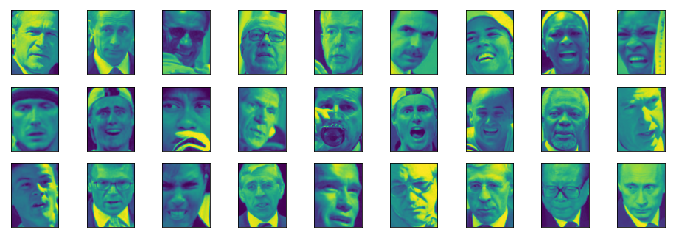

In [85]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12,4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)



> 이상치 검출(outlier detection): 특이한 것을 찾아내는 분석

> 큰 클러스터 하나보다 더 많은 클러스터를 찾으려면 eps를 0.5(기본값)~15 사이 정도로 줄여야 함.





In [86]:
for eps in [1,3,5,7,9,11,13]:
    print("\neps=", eps)
    dbscan=DBSCAN(eps=eps, min_samples=3)
    labels=dbscan.fit_predict(X_pca)
    print("클러스터 수:", len(np.unique(labels)))
    print("클러스터 크기:", np.bincount(labels+1))


eps= 1
클러스터 수: 1
클러스터 크기: [2063]

eps= 3
클러스터 수: 1
클러스터 크기: [2063]

eps= 5
클러스터 수: 1
클러스터 크기: [2063]

eps= 7
클러스터 수: 14
클러스터 크기: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps= 9
클러스터 수: 4
클러스터 크기: [1307  750    3    3]

eps= 11
클러스터 수: 2
클러스터 크기: [ 413 1650]

eps= 13
클러스터 수: 2
클러스터 크기: [ 120 1943]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


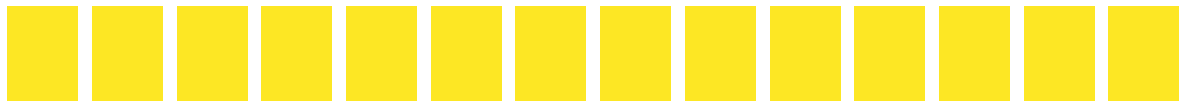

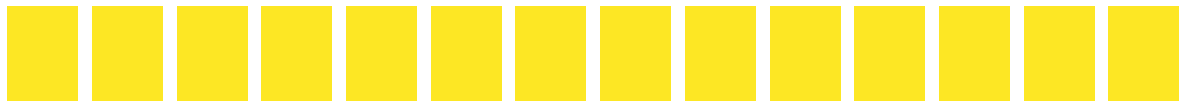

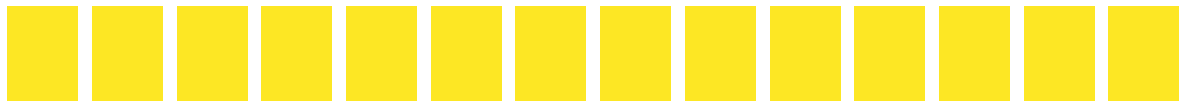

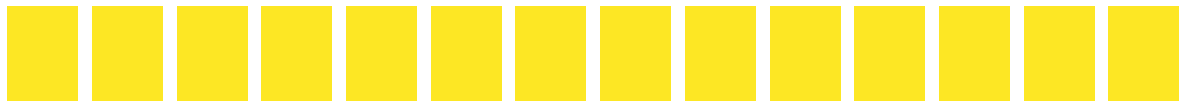

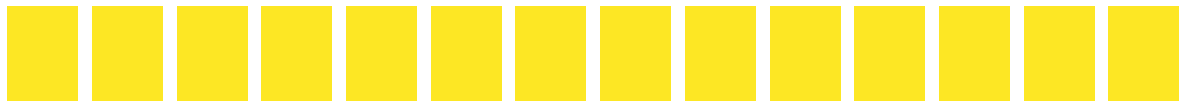

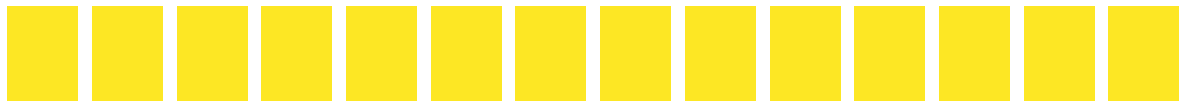

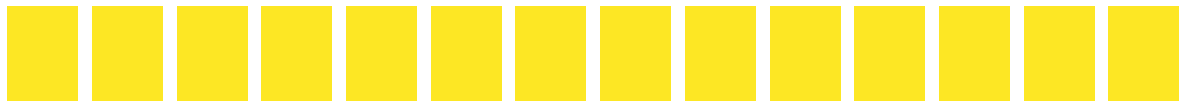

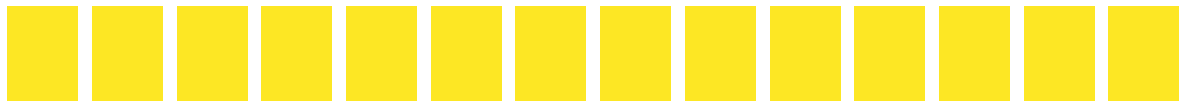

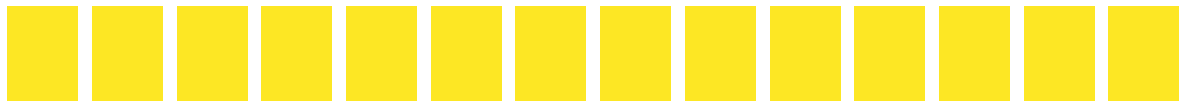

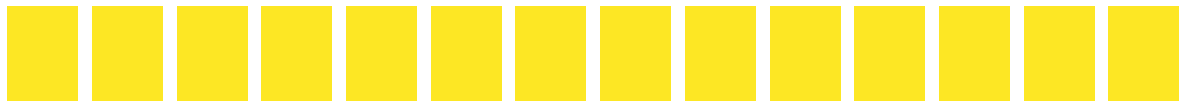

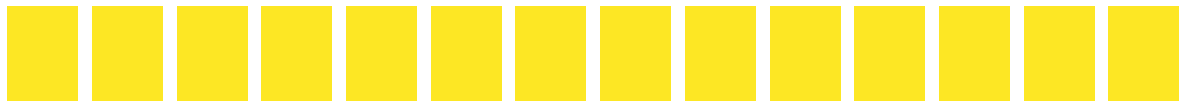

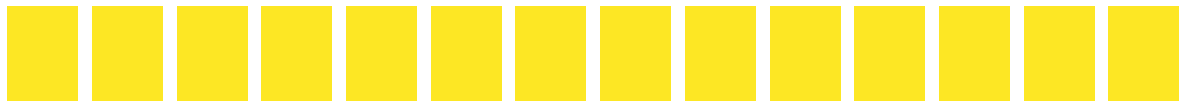

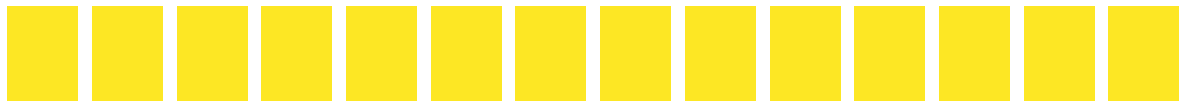

In [88]:
# 사진 안뜨는 오류남
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels)+1):
    mask = labels == clusters
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, 14, figsize=(14*1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    i = 0
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
        i +=1
    for j in range(len(axes) -i):
        axes[j+i].imshow(np.array([[1]*65]*87), vmin=0, vmax=1)
        axes[j+i].axis('off')



> k-평균으로 얼굴 데이터셋 분석하기



In [90]:
# k-평균으로 클러스터를 추출합니다
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("k-평균의 클러스터 크기:", np.bincount(labels_km))

k-평균의 클러스터 크기: [155 175 238  75 358 257  91 219 323 172]


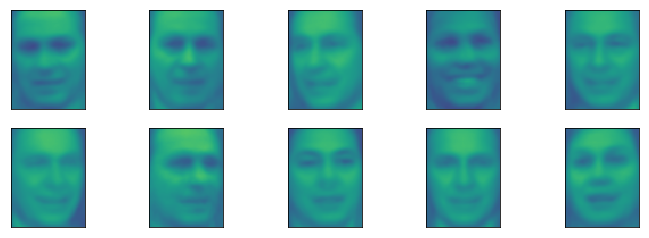

In [93]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12,4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),
              vmin=0, vmax=1)

In [94]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people,
                                y_people, people.target_names)



> 병합 군집으로 얼굴 데이터셋 분석하기



In [95]:
# 병합 군집으로 클러스터를 추출합니다
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("병합 군집의 클러스터 크기:", np.bincount(labels_agg))

병합 군집의 클러스터 크기: [169 660 144 329 217  85  18 261  31 149]


In [96]:
# ARI 점수를 이용해 병합 군집과 k-평균으로 만든 두 데이터가 비슷한지 측정
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))
# 0.09는 두 군집 사이에 공통 부분이 거의 없다는 것

ARI: 0.09


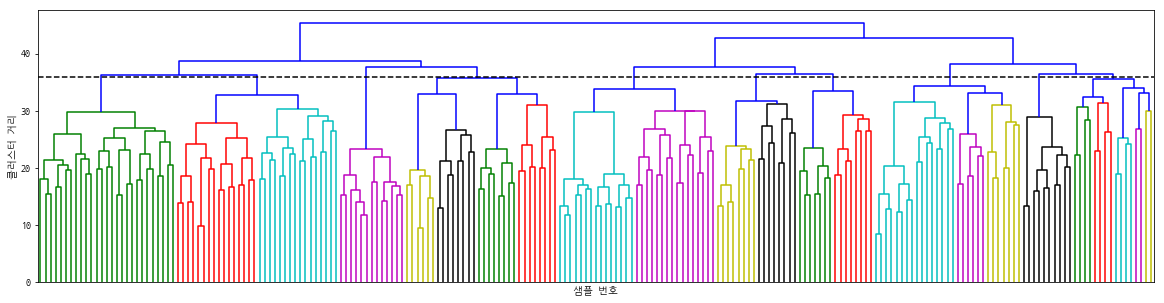

In [97]:
# 덴드로그램
linkage_array = ward(X_pca)
# 클러스터 사이의 거리가 담겨 있는 linkage_array로 덴드로그램을 그립니다.
plt.figure(figsize=(20,5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [36, 36], '--', c='k')

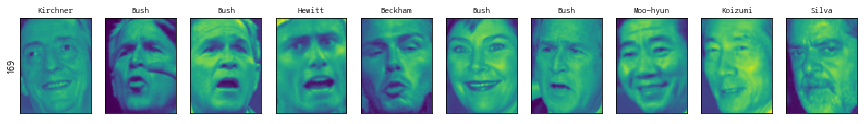

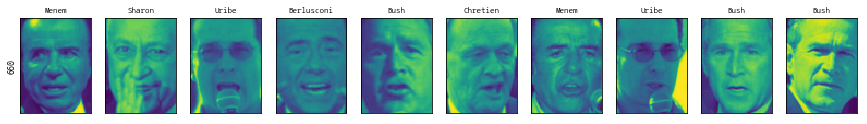

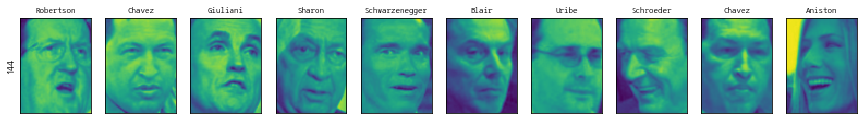

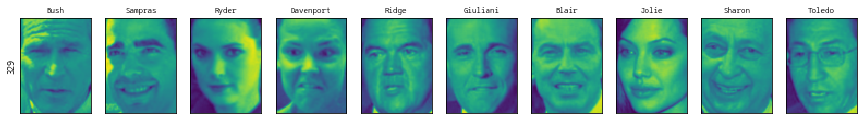

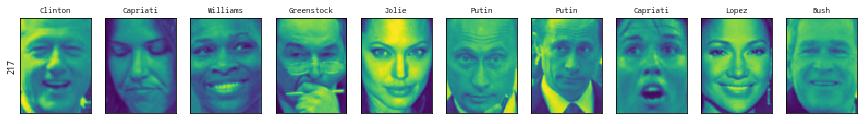

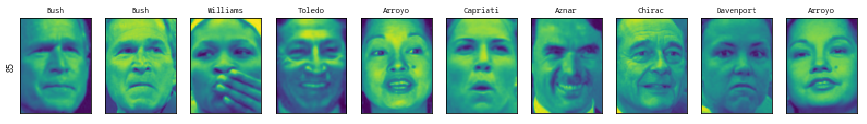

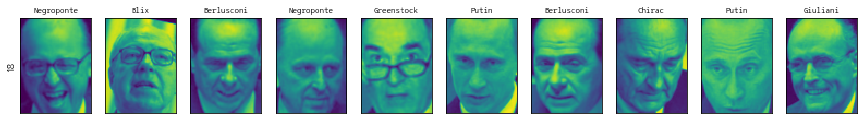

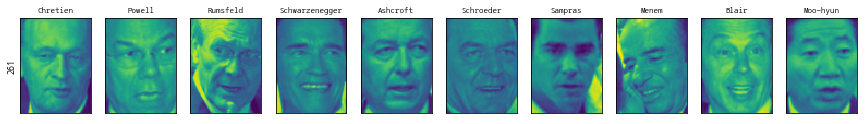

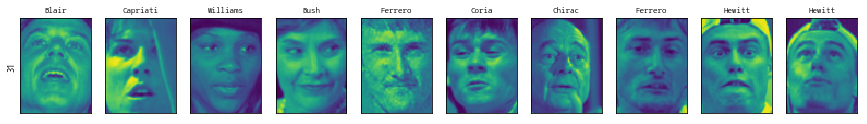

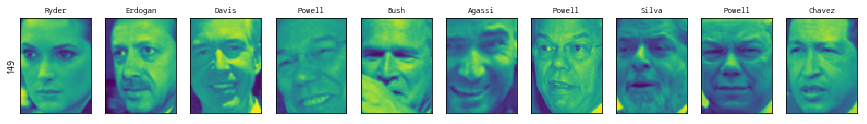

In [98]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15,8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize':9})

병합 군집의 클러스터 크기: [ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]


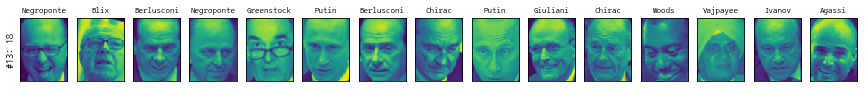

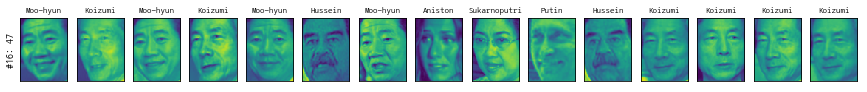

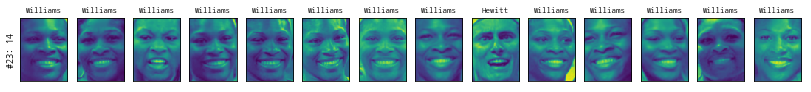

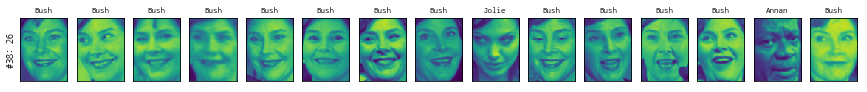

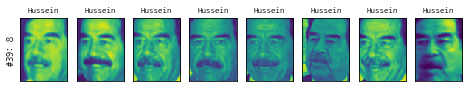

In [99]:
# 병합 군집으로 클러스터를 추출합니다.
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("병합 군집의 클러스터 크기:", np.bincount(labels_agg))

n_clusters = 40
for cluster in [13, 16, 23, 38, 39]: # 흥미로운 클러스터 몇개를 골랐습니다.
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15,8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize':9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

## 3.5.5 군집 알고리즘 요약


> k-평균과 병합 군집은 원하는 클러스터 개수를 지정할 수 있다.


> DBSCAN은 eps 매개변수를 사용하여 클러스터 크기를 간접적으로 조절할 수 있다.

> k-평균은 클러스터 중심을 사용해 클러스터를 구분


> DBSCAN은 클러스터에 할당되지 않는 잡음 포인트를 인식할 수 있고 클러스터의 개수를 자동으로 결정한다.













## 3.6 요약 및 정리

> 분해, 매니폴드 학습, 군집은 주어진 데이터에 대한 이해를 높이기 위한 필수 도구이며, 레이블 정보가 없을 때 데이터를 분석할 수 있는 유일한 방법이다.


### 추정기 인터페이스 요약

> scikit-learn의 모든 전처리, 지도 학습, 비지도 학습 알고리즘은 파이썬 클래스로 구현되어 있고, 이 파이썬 클래스를 추정기(estimator)라고 부름.



In [0]:
#알고리즘을 사용하려면 먼저 이 파이썬 클래스의 객체를 생성해야 한다.

from sklearn.linear_model import LinearRegression
logreg=LogisticRegression()



> 모든 추정기 클래스는 모델을 만들 때 사용하는 fit 메서드를 제송한다. fit 메서드는 항상 첫 번째 매개변수로 데이터 X를 필요로 하며, 하나의 데이터 포인트가 하나의 행이고 연속된 실숫값으로 표현된 NumPy 배열이거나 SciPy 희소 행렬이다.

> 지도 학습 알고리즘은 회귀나 분류에서 필요한 타깃값을 가지고 있는 1차원 NumPy 배열인 y 매개변수도 필요로 한다.

> y 배열과 같은 형태로 새 예측을 만들기 위해서는 predict 메서드를 사용


> 입력 데이터 X의 새로운 표현 형태를 얻기 위해서는 predict 메서드를 사용









In [0]:
!git clone https://github.com/HC-JEONG/Introduction-to-Machine-Learning-with-Python.git